<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/Multi_Label_Model_Evaulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.youtube.com/watch?v=ioYLHUH_ZuI" target="_parent"><img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/watch-on-youtube.png?raw=true" alt="Watch on YouTube"/></a>




([You can watch this notebook (in Turkish) on YouTube!](https://www.youtube.com/watch?v=ioYLHUH_ZuI))



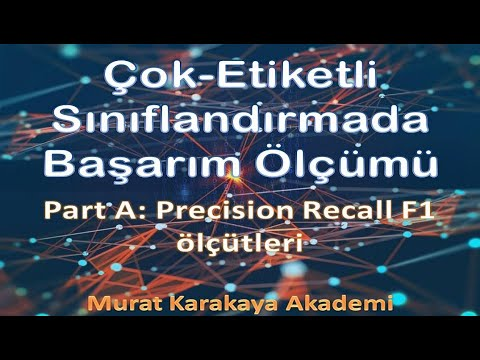

In [0]:
#@title You can watch this notebook (in Turkish) on YouTube!
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ioYLHUH_ZuI')

# Multi Label Model Evaulation

[Definitions:](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-and-multilabel-algorithms)

* **Multiclass classification:** classification task with more than two classes. ***Each sample can only be labelled as one class***.

* For example, classification using features extracted from a set of images of fruit, ***where each image may either be of an orange, an apple, or a pear***. Each image is one sample and is labelled as ***one of the 3 possible classes***. Multiclass classification makes the assumption that each sample is assigned to **one and only one label** - one sample cannot, for example, be both a pear and an apple.


* **Multilabel classification**: classification task labelling each sample with x labels from n_classes possible classes, where x can be **0 to n_classes** **inclusive**. This can be thought of as predicting properties of a sample that are ***not mutually exclusive***. Formally, a binary output is assigned to each class, for every sample. Positive classes are indicated with 1 and negative classes with 0 or -1. It is thus comparable to running n_classes binary classification tasks, for example with sklearn.multioutput.MultiOutputClassifier. This approach treats each label independently whereas multilabel classifiers may treat the multiple classes simultaneously, accounting for correlated behaviour amoung them.

* For example, prediction of the topics relevant to a text document or video. The document or video **may be about one of** ‘religion’, ‘politics’, ‘finance’ or ‘education’, several of the topic classes or all of the topic classes.

**Difference between multi-class classification & multi-label classification** is that in multi-class problems the classes are mutually exclusive, whereas for multi-label problems each label represents a different classification task, but the tasks are somehow related.


[SciKit Learn: 
Model evaluation: quantifying the quality of predictions](https://scikit-learn.org/stable/model_selection.html?highlight=multilabel%20metrics#model-selection-and-evaluation)



In [0]:
%matplotlib inline

#Synthetic Data:
[Calculate mean Average Precision (mAP) for multi-label classification](https://medium.com/@hfdtsinghua/calculate-mean-average-precision-map-for-multi-label-classification-b082679d31be)

First assume that in the data set we have only 3 samples as below. Each sample has 4 classes: A, B, C, and D. 
In samples more than one classes exist! Therefore, the problem multi-label classification!

After some training, some ML model produce the predicted scores.

![Sample Data with scores](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20scores.png?raw=true)


In [0]:
import numpy as np
y_true = np.array([[0, 1, 1, 1],[0,0,1,0],[1,1,0,0]])
y_scores = np.array([[0.2, 0.6, 0.1, 0.8],[0.4,0.9,0.8,0.6],[0.8,0.4,0.5,0.7]])


#Threshold: Let's assume we are using **0.5 as the threshold** for prediction


In [0]:
threshold = 0.5


In [0]:
y_pred=[]
for sample in  y_scores:
  y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
y_pred = np.array(y_pred)
y_pred

array([[0, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 0, 1, 1]])

![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)

# **PART A: Basic Metrics**





# [Accuracy score](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

**In multilabel classification**, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is **0.0**.


In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.0

**Notice**: Here, accuracy is based on if all the 4-class prediction is correct or not.

It is not label-based!

Therefore accuracy is zero!

We have to use better metrics for multilabel classification

# [Confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) 

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix.

By definition, entry i, j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j. 

![Sample Confusion Matrix](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/confusion%20matrix%20sample.png?raw=true)


In [0]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred)

#[Multilabel confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html?highlight=multilabel#sklearn-metrics-multilabel-confusion-matrix)


* Compute a confusion matrix for each class or sample 
* **NOTICE:** The cells has different meaning from Binary Class Confusion Matrix! 

![MCM](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/MCM%20confusion%20matrix%20sample.png?raw=true)

In [0]:
print("Actual \n", y_true)
print("\nPredicted \n",y_pred)


Actual 
 [[0 1 1 1]
 [0 0 1 0]
 [1 1 0 0]]

Predicted 
 [[0 1 0 1]
 [0 1 1 1]
 [1 0 1 1]]


![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true, y_pred)

array([[[2, 0],
        [0, 1]],

       [[0, 1],
        [1, 1]],

       [[0, 1],
        [1, 1]],

       [[0, 2],
        [0, 1]]])

#[Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [0]:
from sklearn.metrics import classification_report

label_names = ['label A', 'label B', 'label C', 'label D']

print(classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

     label A       1.00      1.00      1.00         1
     label B       0.50      0.50      0.50         2
     label C       0.50      0.50      0.50         2
     label D       0.33      1.00      0.50         1

   micro avg       0.50      0.67      0.57         6
   macro avg       0.58      0.75      0.62         6
weighted avg       0.56      0.67      0.58         6
 samples avg       0.56      0.72      0.57         6



#[Precision, recall and F-measures](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)


Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

The F-measure can be interpreted as a weighted harmonic mean of the precision and recall:  reaches its best value at 1 and its worst score at 0.

Several functions allow you to analyze the precision, recall and F-measures score.

#[Precision, recall and F-measures @ Multilabel classification ](https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification)


* In multiclass and multilabel classification task, the notions of precision, 
recall, and F-measures can be applied to each label independently. 

* There are a few ways to combine results across labels, specified by the ***average*** argument to the average_precision_score (multilabel only), f1_score, fbeta_score, precision_recall_fscore_support, precision_score and recall_score functions, as described above. 

* Note that for ***“micro”***-averaging in a multiclass setting with all labels included will produce equal precision, recall and F, while ***“weighted”*** averaging may produce an F-score that is not between precision and recall.

##Precision
[precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn-metrics-precision-score)


* The precision is the ratio **tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The best value is 1 and the worst value is 0.

![Sample Confusion Matrix](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/confusion%20matrix%20sample.png?raw=true)

***average*** parameter is required for multiclass/multilabel targets. 

* **None**, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

* '**micro**':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* '**macro**':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* '**weighted**':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

* '**samples**':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).


In [0]:
print("Actual \n", y_true)
print("\nPredicted \n",y_pred)

Actual 
 [[0 1 1 1]
 [0 0 1 0]
 [1 1 0 0]]

Predicted 
 [[0 1 0 1]
 [0 1 1 1]
 [1 0 1 1]]


####Precision of each label

In [0]:
from sklearn import metrics
print("None ", metrics.precision_score(y_true, y_pred, average=None))  


None  [1.         0.5        0.5        0.33333333]


###Average Precision
[precision_score funtion has](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn-metrics-precision-score)

***average*** parameter is required for multiclass/multilabel targets. 

* **None**, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

* '**micro**':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* '**macro**':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* '**weighted**':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

* '**samples**':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

#### Use precision_score function

In [0]:

print("micro: {:.2f}".format(metrics.precision_score(y_true, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.precision_score(y_true, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.precision_score(y_true, y_pred, average='weighted')))
print("samples: {:.2f} ".format( metrics.precision_score(y_true, y_pred, average='samples')))  




micro: 0.50
macro: 0.58 
weighted: 0.56 
samples: 0.56 


####  [Use average_precision_score function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn-metrics-average-precision-score)

* average_precision_score(y_true, **y_score** , average='macro', sample_weight=None)

*Compute average precision (AP) from prediction scores

* average_precision_score summarizes a **precision-recall curve** as the weighted mean of precisions achieved **at each threshold**, with the increase in recall from the previous threshold used as the weight:

>>$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$
 
where  and  are the precision and recall at the nth threshold [1]. 
* This implementation is not interpolated and is different from computing the area under the precision-recall curve with the trapezoidal rule, which uses linear interpolation and can be too optimistic.

* Note: this implementation is restricted to the binary classification task or **multilabel** classification task.

**IMPORTANT:** 
* Precision refers to precision at a **particular decision threshold**. For example, if you count any model output less than 0.5 as negative, and greater than 0.5 as positive. 
* But sometimes (especially if your classes are not balanced, or if you want to favor precision over recall or vice versa), you may want to **vary this threshold**. **average_precision_score function** gives you ***average precision at all such possible thresholds***, which is also similar to the ***area under the precision-recall curve***. 
* It is a useful metric to compare how well models are ordering the predictions, without considering any specific decision threshold.


In [0]:
y_scores

array([[0.2, 0.6, 0.1, 0.8],
       [0.4, 0.9, 0.8, 0.6],
       [0.8, 0.4, 0.5, 0.7]])

In [0]:
print("micro: {:.2f}".format(metrics.average_precision_score(y_true, y_scores, average='micro')))
print("macro: {:.2f} ".format( metrics.average_precision_score(y_true, y_scores, average='macro')))
print("weighted: {:.2f} ".format( metrics.average_precision_score(y_true, y_scores, average='weighted')))
print("samples: {:.2f} ".format( metrics.average_precision_score(y_true, y_scores, average='samples')))  

micro: 0.64
macro: 0.85 
weighted: 0.81 
samples: 0.72 


#### Calculate micro Precision 
* Calculate metrics **globally** by counting the total true positives and false positives.

The precision is the ratio tp / (tp + fp) 


##### Count by yourself

![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)

In [0]:
np.concatenate((y_true.reshape((12,1), order='F'), y_pred.reshape((12,1), order='F')), axis=1)

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1]])

In [0]:
TP=((y_true * y_pred) == 1).sum()
print("TP: ", TP)

TP:  4


In [0]:
converted_y_true= np.copy(y_true)
converted_y_true[converted_y_true==1] = 5
converted_y_true[converted_y_true==0] = 1
converted_y_true[converted_y_true==5] = 0
FP= ((converted_y_true * y_pred)== 1).sum()
print("FP: ", FP)

FP:  4


In [0]:
print(" Micro Precision {:.2f}".format(TP/(TP+FP)))

 Micro Precision 0.50


##### Flatten & use as in binary classification

In [0]:
print("Micro Precision: {:.2f}".format(metrics.precision_score(y_true.ravel(), y_pred.ravel())))

Micro Precision: 0.50


In [0]:
print(classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

     label A       1.00      1.00      1.00         1
     label B       0.50      0.50      0.50         2
     label C       0.50      0.50      0.50         2
     label D       0.33      1.00      0.50         1

   micro avg       0.50      0.67      0.57         6
   macro avg       0.58      0.75      0.62         6
weighted avg       0.56      0.67      0.58         6
 samples avg       0.56      0.72      0.57         6



#### Calculate macro Precision 
* Calculate metrics for each label, and find their **unweighted** mean. 
* This **does not** take label **imbalance** into account.

The precision is the ratio tp / (tp + fp) 

In [0]:
totalPrecision= 0
for i in range (len(label_names)):
  p= metrics.precision_score(y_true[:,i], y_pred[:,i])
  totalPrecision+= p
  print("For {} precision: {:.2f}".format(label_names[i], p))
print("Macro Precision: {:.2f}".format(totalPrecision/len(label_names)))

For label A precision: 1.00
For label B precision: 0.50
For label C precision: 0.50
For label D precision: 0.33
Macro Precision: 0.58


#### Calculate weighted Precision 
*  Calculate metrics for each label, and find their average **weighted by support** (the number of true instances for each label). 
*  This alters ‘macro’ to account for label **imbalance**; it can result in an *F-score that is not between precision and recall*.

The precision is the ratio tp / (tp + fp) 



In [0]:
totalPrecision=0
totalSupport=0
for i in range (len(label_names)):
  p= metrics.precision_score(y_true[:,i], y_pred[:,i])
  support= (y_true[:,i]==1).sum()
  totalSupport+=support
  totalPrecision+= p*support
  print("For {} precision: {:.2f} support: {}".format(label_names[i], p, support ))
print("Weighted Precision: {:.2f}".format(totalPrecision/totalSupport))





For label A precision: 1.00 support: 1
For label B precision: 0.50 support: 2
For label C precision: 0.50 support: 2
For label D precision: 0.33 support: 1
Weighted Precision: 0.56


In [0]:
print(classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

     label A       1.00      1.00      1.00         1
     label B       0.50      0.50      0.50         2
     label C       0.50      0.50      0.50         2
     label D       0.33      1.00      0.50         1

   micro avg       0.50      0.67      0.57         6
   macro avg       0.58      0.75      0.62         6
weighted avg       0.56      0.67      0.58         6
 samples avg       0.56      0.72      0.57         6



#### Calculate Samples Precision 

* Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)


In [0]:
totalPrecision=0

for i in range (len(y_true)):
  p= metrics.precision_score(y_true[i,:], y_pred[i,:])
  totalPrecision+=p
  print("For Sample {} precision: {:.2f} ".format(y_true[i,:], p ))
print("Sample Precision: {:.2f}".format(totalPrecision/len(y_true)))


For Sample [0 1 1 1] precision: 1.00 
For Sample [0 0 1 0] precision: 0.33 
For Sample [1 1 0 0] precision: 0.33 
Sample Precision: 0.56


##Recall
[recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score#sklearn-metrics-recall-score)


* Compute the recall: The recall is the ratio **tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The best value is 1 and the worst value is 0.

![Sample Confusion Matrix](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/confusion%20matrix%20sample.png?raw=true)


***average*** parameter is required for multiclass/multilabel targets. 

* **None**, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

* '**micro**':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* '**macro**':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* '**weighted**':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

* '**samples**':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

### Recall of each label

![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)

In [0]:
print("Recall of each label: {}".format(metrics.recall_score(y_true, y_pred, average=None)))

Recall of each label: [1.  0.5 0.5 1. ]


### Average Recall

In [0]:
print("micro: {:.2f}".format(metrics.recall_score(y_true, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.recall_score(y_true, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.recall_score(y_true, y_pred, average='weighted')))
print("samples: {:.2f} ".format( metrics.recall_score(y_true, y_pred, average='samples')))  

micro: 0.67
macro: 0.75 
weighted: 0.67 
samples: 0.72 


##F1 score
[f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1_score#sklearn-metrics-f1-score)


* Compute the F1 score, also known as balanced F-score or F-measure

* The F1 score can be interpreted as a ***weighted average of the precision and recall***, where an F1 score reaches its best value at 1 and worst score at 0. 

* The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

> >>`F1 = 2 * (precision * recall) / (precision + recall)`


In the multi-class and **multi-label** case, this is the** weighted average of the F1 score of each class**.


***average*** parameter is required for multiclass/multilabel targets. 

* **None**, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

* '**micro**':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* '**macro**':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* '**weighted**':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

### F1 of each label

In [0]:
print("F1 of each label: {}".format(metrics.f1_score(y_true, y_pred, average=None)))

F1 of each label: [1.  0.5 0.5 0.5]


### Average F1

In [0]:
print("micro: {:.2f}".format(metrics.f1_score(y_true, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.f1_score(y_true, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.f1_score(y_true, y_pred, average='weighted')))
print("samples: {:.2f} ".format( metrics.f1_score(y_true, y_pred, average='samples')))  

micro: 0.57
macro: 0.62 
weighted: 0.58 
samples: 0.57 


## Summary

* **Remember**: We assumed that we are using **0.5 as the threshold** for prediction during all the computations above.

* What hapens if we select **different** values as the threshold?

Let's see!

In [0]:
print("y_true: \n{}".format(y_true))
print("y_scores: \n{}".format(y_scores))

y_true: 
[[0 1 1 1]
 [0 0 1 0]
 [1 1 0 0]]
y_scores: 
[[0.2 0.6 0.1 0.8]
 [0.4 0.9 0.8 0.6]
 [0.8 0.4 0.5 0.7]]


In [0]:
def predictLabelForGivenThreshold(threshold):
  y_pred=[]
  for sample in  y_scores:
    y_pred.append([1 if i>=threshold else 0 for i in sample ] )
  return np.array(y_pred)
  

### Classification Report when threshold = 0.5

![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)

In [0]:
y_pred  = predictLabelForGivenThreshold(0.5)
print(classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

     label A       1.00      1.00      1.00         1
     label B       0.50      0.50      0.50         2
     label C       0.50      0.50      0.50         2
     label D       0.33      1.00      0.50         1

   micro avg       0.50      0.67      0.57         6
   macro avg       0.58      0.75      0.62         6
weighted avg       0.56      0.67      0.58         6
 samples avg       0.56      0.72      0.57         6



### Classification Report when threshold = 0.2

![alt text](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictions%2002.png?raw=true)

In [0]:
y_pred  = predictLabelForGivenThreshold(0.2)
print(classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

     label A       0.33      1.00      0.50         1
     label B       0.67      1.00      0.80         2
     label C       0.50      0.50      0.50         2
     label D       0.33      1.00      0.50         1

   micro avg       0.45      0.83      0.59         6
   macro avg       0.46      0.88      0.57         6
weighted avg       0.50      0.83      0.60         6
 samples avg       0.47      0.89      0.58         6



### Classification Report when threshold = 0.8

![alt text](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictions%2008.png?raw=true)

In [0]:
y_pred  = predictLabelForGivenThreshold(0.8)
print(classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

     label A       1.00      1.00      1.00         1
     label B       0.00      0.00      0.00         2
     label C       1.00      0.50      0.67         2
     label D       1.00      1.00      1.00         1

   micro avg       0.75      0.50      0.60         6
   macro avg       0.75      0.62      0.67         6
weighted avg       0.67      0.50      0.56         6
 samples avg       0.83      0.61      0.61         6



### Which threshold?

* Which threshold yileds better result?
* Which metric do you care?
* How can you compare different models' success/performance?
* Which precision/recall/f1 value to report?

<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/ROC.png?raw=true" alt="drawing" width="400"/>


# PART B: ROC & AUC

<a href="https://www.youtube.com/watch?v=KIQ_27Y0I1c" target="_parent"><img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/watch-on-youtube.png?raw=true" alt="Watch on YouTube"/></a>




([You can watch this notebook (in Turkish) on YouTube!](https://www.youtube.com/watch?v=KIQ_27Y0I1c))

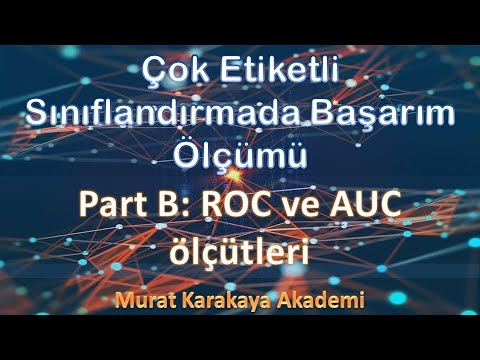

In [0]:
#@title You can watch this notebook (in Turkish) on YouTube!
from IPython.lib.display import YouTubeVideo
YouTubeVideo('KIQ_27Y0I1c')

# [Receiver operating characteristic (ROC) ](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)

The function **roc_curve** computes the **receiver operating characteristic** curve, or ROC curve. 

Quoting Wikipedia :
* A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the ***performance of a binary classifier*** system as its discrimination **threshold is varied**. 

![Sample Confusion Matrix](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/confusion%20matrix%20sample.png?raw=true)


* It is created by plotting the fraction of ***true positives out of the positives*** (TPR = true positive rate) vs. the fraction of ***false positives out of the negatives*** (FPR = false positive rate), at **various threshold settings**. 

<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/ROC.png?raw=true" alt="drawing" width="500"/>


* TPR is also known as **sensitivity**, and FPR is one minus the **specificity** or true negative rate.”


* The **roc_auc_score function** computes the ***area*** under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, **the curve information is summarized in one number**. 

* In **multi-label** classification, the roc_auc_score function is extended by ***averaging over the labels*** as above.




## [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn-metrics-roc-curve)

Compute Receiver operating characteristic (ROC)

* Note: this implementation is restricted to the **binary classification** task.


Returns:

>* **fpr**: Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

>* **tpr**: Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

>* **thresholds**: Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

### One label at a time

* We can NOT directly use roc_curve funtion to **multilabel** classification.

* However, we can select 1 label at a time and calculate its roc_curve values!

* Remeber we are given that:

![Sample Data with scores](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20scores.png?raw=true)


### Classification Report when threshold = 0.5

![Predictions](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictionss.png?raw=true)


### Classification Report when threshold = 0.2

![alt text](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictions%2002.png?raw=true)

### Classification Report when threshold = 0.8

![alt text](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20predictions%2008.png?raw=true)


### For eachthreshold we will end up with a different Confusion Matrix. For example for threshold 0.8 for Label A we can fill the following Confusion Matrix as below:

![Sample Confusion Matrix](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/confusion%20matrix%20sample.png?raw=true)


* Let's select first label as a binary classification


In [0]:
#@title Let's select first label as a binary classification:
selectedLabel=2 #@param {type:"integer"}

In [0]:
print("y_true\n", y_true)
y_binary = y_true[:,selectedLabel]
print("y_binary\n", y_binary)

y_true
 [[0 1 1 1]
 [0 0 1 0]
 [1 1 0 0]]
y_binary
 [1 1 0]


In [0]:
y_binary_scores = y_scores[:,selectedLabel]
print("y_binary_scores\n", y_binary_scores)

y_binary_scores
 [0.1 0.8 0.5]


#### Finding TPR, FPR

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_binary, y_binary_scores)
print("selected label {}\nfpr {} \ntpr {} \nthresholds {}".format(label_names[selectedLabel], fpr, tpr, thresholds))

selected label label C
fpr [0. 0. 1. 1.] 
tpr [0.  0.5 0.5 1. ] 
thresholds [1.8 0.8 0.5 0.1]


<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/sample%20mutli%20label%20classification%20scores.png?raw=true" alt="sample" width="700"/>

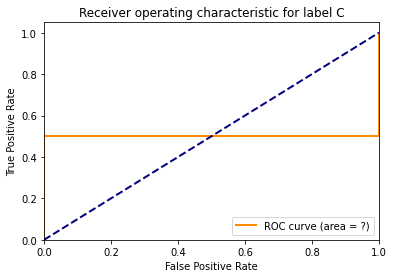

In [0]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = ?)' )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for {}'.format(label_names[selectedLabel]))
plt.legend(loc="lower right")
plt.show()

## [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=roc_curve#sklearn-metrics-plot-roc-curve)

Note: this implementation is restricted to the** binary classification** task.

### Let's create a Syntectic multi Label dataset

In [0]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import plot_roc_curve

X, y = make_multilabel_classification(n_classes=5, n_labels=3, allow_unlabeled=False, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

print("X_train {} y_train {} ".format(X_train.shape,y_train.shape))



X_train (75, 20) y_train (75, 5) 


### Train a OneVsRestClassifier 

In [0]:
clf = OneVsRestClassifier(LogisticRegression(random_state=0))
clf.fit(X_train, y_train)
  

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False),
                    n_jobs=None)

### Get the predictions & scores from the classifier

In [0]:
preds = clf.predict(X_test )
scores = clf.predict_proba(X_test)

In [0]:
sample=15
print("prediction for sample {} {}".format(sample, preds[sample]))
print("probabilities for sample {} {}".format(sample, scores[sample]))


prediction for sample 15 [1 1 0 1 0]
probabilities for sample 15 [0.90073288 0.99803251 0.46004083 0.97284895 0.16309675]


### In a multilabel classification, plot_roc_curve will **generate error!**

In [0]:
#plot_roc_curve(clf, X_test, y_test)  
#plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-107-d9b794d228ad> in <module>()
----> 1 plot_roc_curve(clf, X_test, y_test)
      2 plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_plot/roc_curve.py in plot_roc_curve(estimator, X, y, sample_weight, drop_intermediate, response_method, name, ax, **kwargs)
    178     if y_pred.ndim != 1:
    179         if y_pred.shape[1] != 2:
--> 180             raise ValueError(classification_error)
    181         else:
    182             y_pred = y_pred[:, 1]

**ValueError: OneVsRestClassifier should be a binary classifier**

### One Label at a time: A simple work around

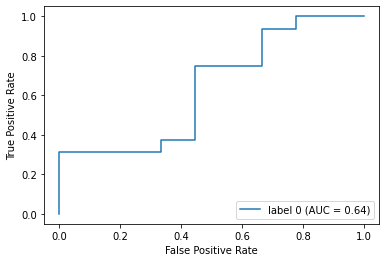

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train[:,0])
label_0= plot_roc_curve(clf, X_test, y_test[:,0], name= 'label 0',)  
plt.show() 

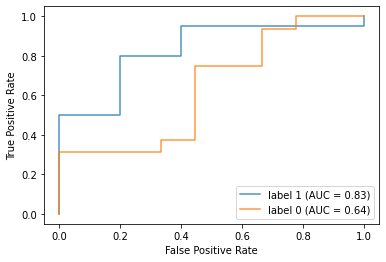

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train[:,1])
ax = plt.gca()
label_1 = plot_roc_curve(clf, X_test, y_test[:,1], name= 'label 1', ax=ax, alpha=0.8)
label_0.plot(ax=ax, alpha=0.8)
plt.show()

### In a loop

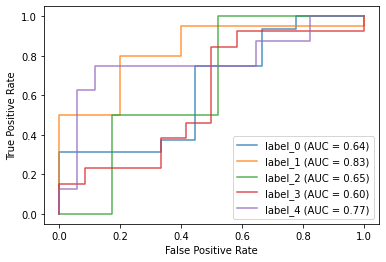

In [0]:
labelPlots ={}
for i in range (len(label_names)+1):
  clf = LogisticRegression(random_state=0)
  clf.fit(X_train, y_train[:,i])
  ax = plt.gca()
  labelPlots[i]= plot_roc_curve(clf, X_test, y_test[:,i], name= ('label_'+str(i)), ax=ax, alpha=0.8) 
  
plt.show()



<img src="https://github.com/kmkarakaya/ML_tutorials/blob/master/images/ROC.png?raw=true" alt="drawing" width="400"/>

## [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn-metrics-roc-auc-score)

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

Note: **this implementation can be used** with binary, multiclass and **multilabel classification**, but some restrictions apply (see Parameters).

roc_auc_score(y_true, y_score, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

Parameters:

* **y_true** array-like of shape (n_samples,) or (n_samples, n_classes)
True labels or binary label indicators. The binary and multiclass cases expect labels with shape (n_samples,) while the **multilabel case expects binary label indicators with shape (n_samples, n_classes)**.

* **y_score**: array-like of shape (n_samples,) or (n_samples, n_classes)
Target scores. In the binary and multilabel cases, these can be either probability estimates or non-thresholded decision values (as returned by decision_function on some classifiers). **In the multiclass** case, these must be **probability estimates which sum to 1**. The binary case expects a shape (n_samples,), and the scores must be the scores of the class with the greater label. The multiclass and **multilabel cases expect a shape (n_samples, n_classes). In the multiclass case, the order of the class scores must correspond to the order of labels, if provided, or else to the numerical or lexicographical order of the labels in y_true.**

* **average**: {‘micro’, ‘macro’, ‘samples’, ‘weighted’} or None, default=’macro’

In [0]:
from sklearn.metrics import roc_auc_score
print("roc_auc_score for different averaging methods:")
print("\tmacro:{:.2} ".format(roc_auc_score(y_test, scores)))
print("\tmicro: {:.2} ".format(roc_auc_score(y_test, scores, average='micro')))
print("\tweighted: {:.2} ".format(roc_auc_score(y_test, scores, average='weighted')))
print("\tNone: {} ".format(roc_auc_score(y_test, scores, average=None)))

roc_auc_score for different averaging methods:
	macro:0.7 
	micro: 0.78 
	weighted: 0.71 
	None: [0.63888889 0.83       0.65217391 0.59615385 0.77205882] 


In [0]:
roc_auc_score(y_test, scores, average=None).mean()

0.697855094323125

# PART C: Precision-Recall Curve


Precision-Recall is a useful measure of success of prediction when the
classes are very **imbalanced**. In information retrieval, precision is a
measure of result relevancy, while recall is a measure of how many truly
relevant results are returned.



IMPLICATIONS:
* The precision-recall curve shows the **tradeoff** between precision and
recall for different threshold. 

* A **high area** under the curve represents
both **high** **recall** and high **precision**.

* A **high precision** relates to a **low false positive rate**

* A **high recall** relates to a **low false negative rate**. 

* **High scores for both** show that the classifier is returning **accurate results** (high precision), as well as returning a **majority of all positive results** (high recall).

* A system with **high recall but low precision** returns **many results**, but **most** of its predicted labels are **incorrect** when compared to the training labels. 

* A system with **high precision but low recall** is just the opposite, returning **very few results**, but **most** of its predicted labels are **correct** when compared to the
training labels. 

* An **ideal system** with **high precision** and **high recall** will return **many results**, with all results labeled **correctly**.



DEFINITIONS

* **Precision** **($P$)** is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false positives ($F_p$)
$P = \frac{T_p}{T_p+F_p}$

* **Recall ($R$)** is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false negatives ($F_n$).
$R = \frac{T_p}{T_p + F_n}$

* **($F_1$) score** These quantities are also related to the **($F_1$) score**, which is defined as the harmonic mean of precision and recall.
$F1 = 2\frac{P \times R}{P+R}$



INSIGHT:
* Note that the **precision** **may not** **decrease** with **recall**. 
* The definition of **precision** ($\frac{T_p}{T_p + F_p}$) shows that **lowering** the **threshold** of a classifier **may increase** the denominator, by increasing the
number of results returned. 

* If the threshold was **previously set too high**, the
new results may all be true positives, which will **increase precision**. 

* If the previous threshold was **about right or too low**, further lowering the threshold will introduce false positives, **decreasing precision**.

* Recall is defined as $\frac{T_p}{T_p+F_n}$, where $T_p+F_n$ **does not depend** on the classifier **threshold**. 

* This means that **lowering** the classifier threshold **may increase recall**, by increasing the number of true positive
results. 

* It is also possible that **lowering** the threshold may leave recall **unchanged**, while the **precision fluctuates**.

* The relationship between recall and precision can be observed in the **stairstep** area of the plot - **at the edges** of these steps a **small change** in the threshold considerably **reduces precision**, with only a **minor gain in recall**.



**Average precision** (AP) summarizes such a plot as the weighted mean of
precisions achieved at each threshold, with the increase in recall from the
previous threshold used as the weight:

$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$

where $P_n$ and $R_n$ are the precision and recall at the
nth threshold. A pair $(R_k, P_k)$ is referred to as an
*operating point*.

AP and the trapezoidal area under the operating points
(:func:`sklearn.metrics.auc`) are common ways to summarize a precision-recall
curve that lead to different results. Read more in the
`User Guide <precision_recall_f_measure_metrics>`.

Precision-recall curves are typically used in binary classification to study
the output of a classifier. In order to extend the precision-recall curve and
average precision to multi-class or multi-label classification, it is necessary
to binarize the output. One curve can be drawn per label, but one can also draw
a precision-recall curve by considering each element of the label indicator
matrix as a binary prediction (micro-averaging).

<div class="alert alert-info"><h4>Note</h4><p>See also :func:`sklearn.metrics.average_precision_score`,
             :func:`sklearn.metrics.recall_score`,
             :func:`sklearn.metrics.precision_score`,
             :func:`sklearn.metrics.f1_score`</p></div>


In binary classification settings
--------------------------------------------------------

Create simple data
..................

Try to differentiate the two first classes of the iris data



In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target



In [0]:
X.shape



(150, 4)

In [0]:
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

random_features= random_state.randn(n_samples, 200 * n_features)
X = np.c_[X,random_features ]



In [0]:
X.shape


(150, 804)

In [0]:
# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_predict = classifier.predict(X_test)

In [0]:
print(y_score[:5])
print(y_predict[:5])


[-0.20078869  0.30423874  0.20105976  0.27523711  0.42593404]
[0 1 1 1 1]


Compute the average precision score
...................................



In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


Plot the Precision-Recall curve
................................



Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

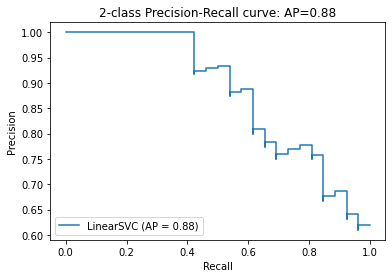

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In multi-label settings
------------------------

Create multi-label data, fit, and predict
...........................................

We create a multi-label dataset, to illustrate the precision-recall in
multi-label settings



In [0]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
y_predict =  classifier.predict(X_test)



In [0]:
print(y_score[:5])
print(y_predict[:5])

[[ 0.25628897 -0.61927322 -0.35802998]
 [-0.71111092  0.2383498  -0.49737585]
 [-0.51613583 -0.10590918 -0.3261403 ]
 [ 0.40527179 -0.85846183 -0.55666324]
 [-0.54877637 -0.23572974 -0.13186753]]
[[1 0 0]
 [0 1 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]]


The average precision score in multi-label settings
....................................................



In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.43


### Synthetic Data


In [0]:
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)
print(precision)
print(recall)
print(thresholds)


[0.66666667 0.5        1.         1.        ]
[1.  0.5 0.5 0. ]
[0.35 0.4  0.8 ]


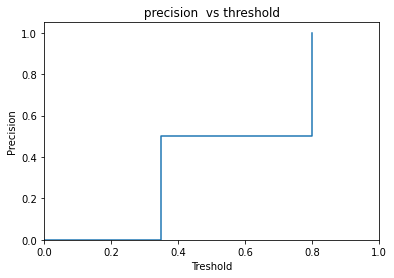

In [0]:
plt.figure()

#plt.step(np.append(0.0,thresholds), np.flip(precision), where='post')
plt.step(np.append(0.0,thresholds), np.flip(recall), where='post')
plt.xlabel('Treshold')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' precision  vs threshold ')
plt.show()

In [0]:
# For each class
precision = dict()
recall = dict()
treshold = dict()
average_precision = dict()


Y_actual= np.array([[0,1,1,1], [0,0,1,0], [1,1,0,0]], dtype=np.int)
y_prediction= np.array([[0.2,0.6,0.1,0.8],[0.4,0.9,0.8,0.6],[0.8,0.4,0.5,0.7]], dtype=np.float64)

n_classes = Y_actual.shape[1]

In [0]:
for i in range(n_classes):
    precision[i], recall[i], treshold[i] = precision_recall_curve(Y_actual[:, i], y_prediction[:, i])
    average_precision[i] =average_precision_score(Y_actual[:, i], y_prediction[:, i])

print ("average_precision {} ".format(average_precision))

average_precision {0: 1.0, 1: 0.5833333333333333, 2: 0.8333333333333333, 3: 1.0} 


In [0]:
x=np.append(treshold[2],1)

print(x)
print((precision[2]))


[0.1 0.5 0.8 1. ]
[0.66666667 0.5        1.         1.        ]


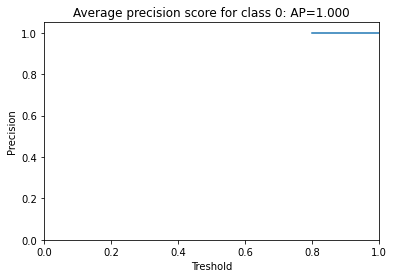

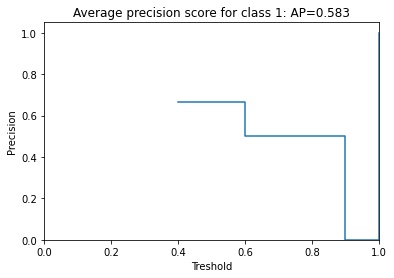

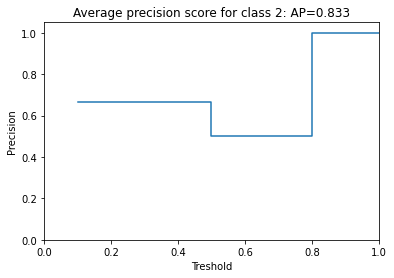

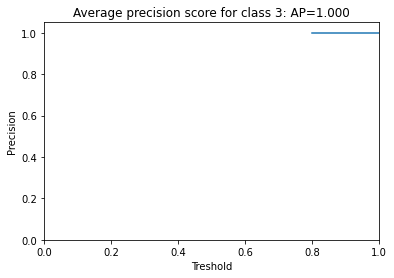

In [0]:
plt.figure()

for i in range(n_classes):
  plt.step(np.append(treshold[i],1), precision[i], where='post')
  plt.xlabel('Treshold')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(
    'Average precision score for class {}: AP={:.3f}'.format(i, average_precision[i]))
  plt.show()

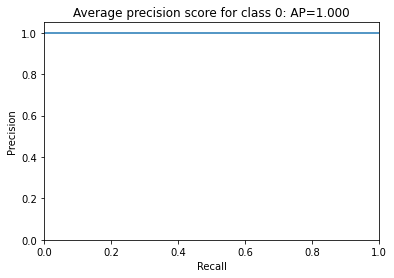

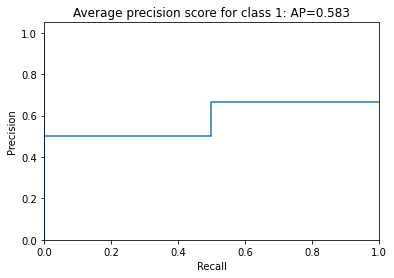

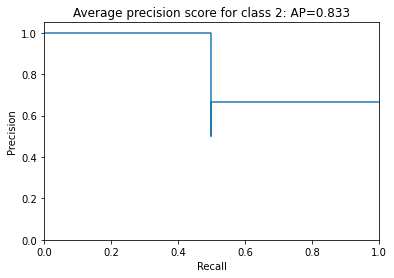

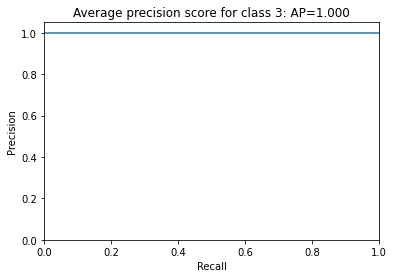

In [0]:
plt.figure()

for i in range(n_classes):
  plt.step(recall[i], precision[i], where='post')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(
    'Average precision score for class {}: AP={:.3f}'.format(i, average_precision[i]))
  plt.show()

In [0]:



# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_actual.ravel(),
    y_prediction.ravel())
average_precision["None"] = average_precision_score(Y_actual, y_prediction, average=None)
average_precision["Void"] = average_precision_score(Y_actual, y_prediction)
average_precision["micro"] = average_precision_score(Y_actual, y_prediction, average="micro")
average_precision["macro"] = average_precision_score(Y_actual, y_prediction, average="macro")
average_precision["samples"] = average_precision_score(Y_actual, y_prediction, average="samples")
average_precision["weighted"] = average_precision_score(Y_actual, y_prediction, average="weighted")

#print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    
average_precision

{0: 1.0,
 1: 0.5833333333333333,
 2: 0.8333333333333333,
 3: 1.0,
 'None': array([1.        , 0.58333333, 0.83333333, 1.        ]),
 'Void': 0.8541666666666666,
 'macro': 0.8541666666666666,
 'micro': 0.6369047619047619,
 'samples': 0.7222222222222222,
 'weighted': 0.8055555555555555}

In [0]:
precision

{0: array([1., 1.]),
 1: array([0.66666667, 0.5       , 0.        , 1.        ]),
 2: array([0.66666667, 0.5       , 1.        , 1.        ]),
 3: array([1., 1.]),
 'micro': array([0.5       , 0.45454545, 0.5       , 0.5       , 0.57142857,
        0.6       , 0.75      , 0.        , 1.        ])}

Plot the micro-averaged Precision-Recall curve
...............................................




Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.64')

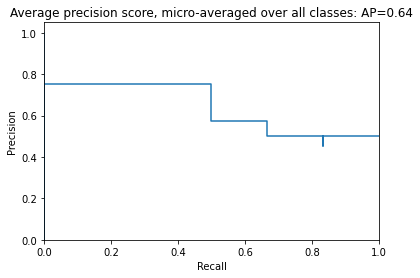

In [0]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

Plot Precision-Recall curve for each class and iso-f1 curves
.............................................................




In [0]:
np.linspace(0.01, 1)

array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])

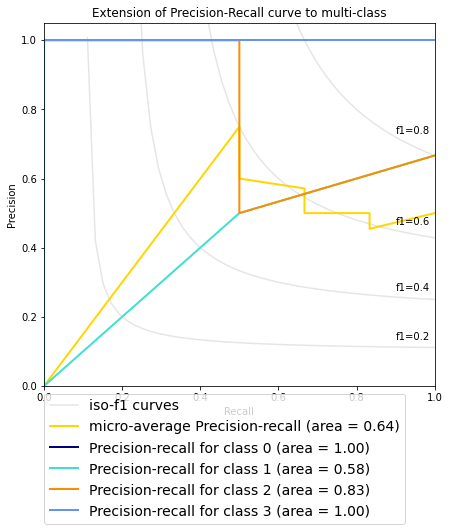

In [0]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()